In [52]:
import os
import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [48]:
def load_wav_files(folder_path):
    data = {'filename': [], 'audio': [], 'duration':[]}
    for filename in os.listdir(folder_path):
        if filename.endswith(".wav"):
            file_path = os.path.join(folder_path, filename)
            try:
                # Load audio file using librosa
                audio_array, sr = librosa.load(file_path, sr=None)
                duration = np.round(librosa.get_duration(y=audio_array, sr=sr),2)
                data['filename'].append(file_path)
                data['audio'].append(audio_array)
                data['duration'].append(duration)
            except Exception as e:
                print(f"Error processing {filename}: {str(e)}")
    df = pd.DataFrame(data)
    return df

In [54]:
noisy_files_path = './noisy_trainset_28spk_wav/'
noisy_df = load_wav_files(noisy_files_path)
noisy_df.shape

(11572, 3)

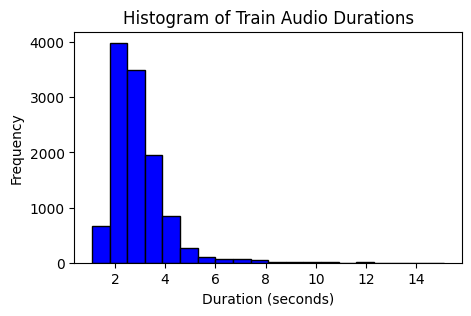

In [59]:
plt.figure(figsize=(5,3))
plt.hist(noisy_df['duration'], bins=20, color='blue', edgecolor='black')
plt.title('Histogram of Train Audio Durations')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.show()

In [68]:
noisy_df['duration'].min(),noisy_df['duration'].max(),noisy_df['duration'].mean(),noisy_df['duration'].median()

(1.09, 15.11, 2.921566712754926, 2.68)

In [57]:
clean_files_path = './clean_testset_wav/'
clean_df = load_wav_files(clean_files_path)
clean_df.shape

(824, 3)

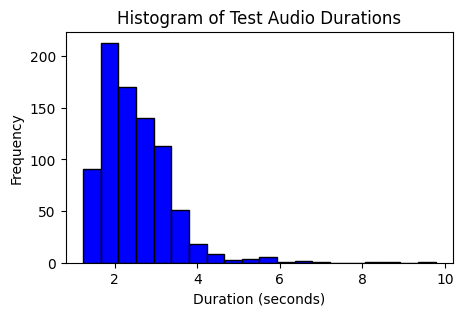

In [60]:
plt.figure(figsize=(5,3))
plt.hist(clean_df['duration'], bins=20, color='blue', edgecolor='black')
plt.title('Histogram of Test Audio Durations')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.show()

In [67]:
clean_df['duration'].min(),clean_df['duration'].max(),clean_df['duration'].mean(),clean_df['duration'].median()

(1.24, 9.77, 2.5144902912621356, 2.325)